In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
data = pd.read_csv('needed_food_data.csv')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5871 entries, 0 to 5870
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   market     5871 non-null   object 
 1   latitude   5871 non-null   float64
 2   longitude  5871 non-null   float64
 3   commodity  5871 non-null   object 
 4   unit       5871 non-null   object 
 5   price      5871 non-null   float64
 6   year       5871 non-null   int64  
 7   month      5871 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 367.1+ KB


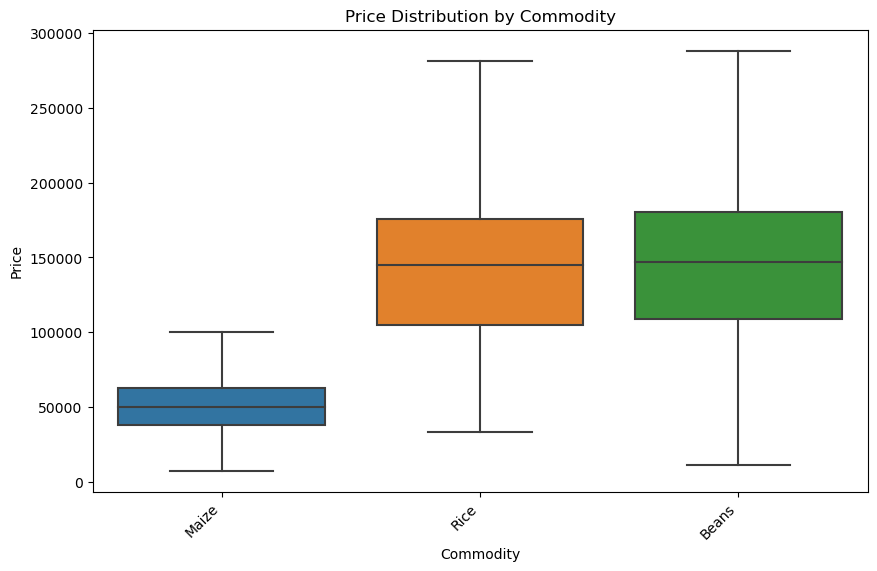

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="commodity", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Commodity")
plt.ylabel("Price")
plt.show()

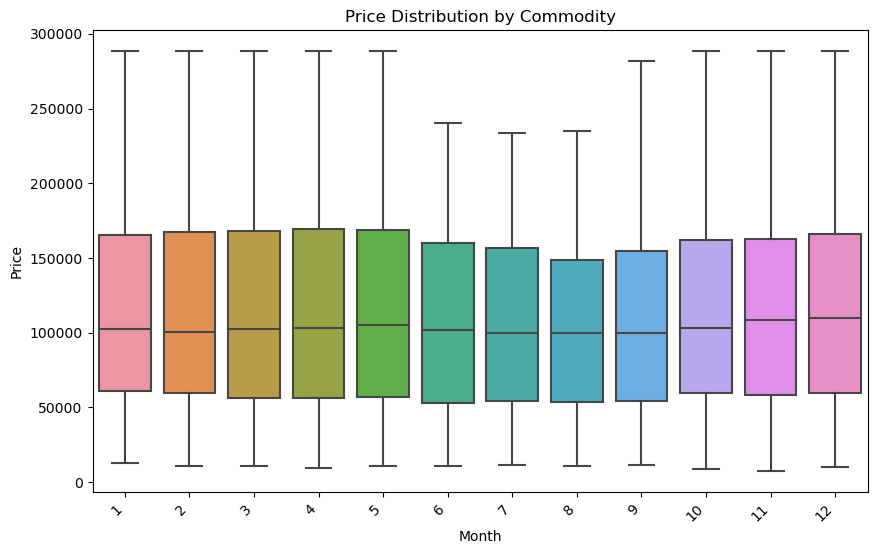

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="month", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

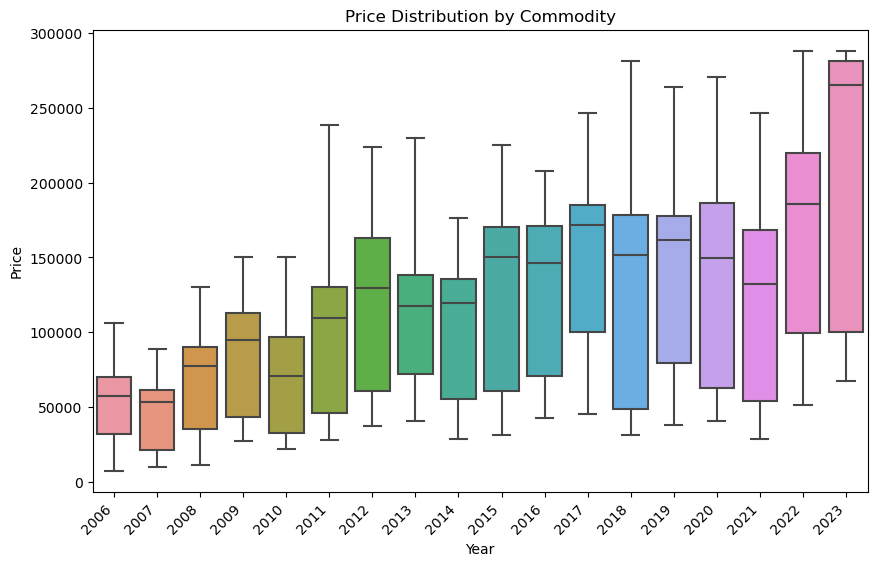

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="year", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

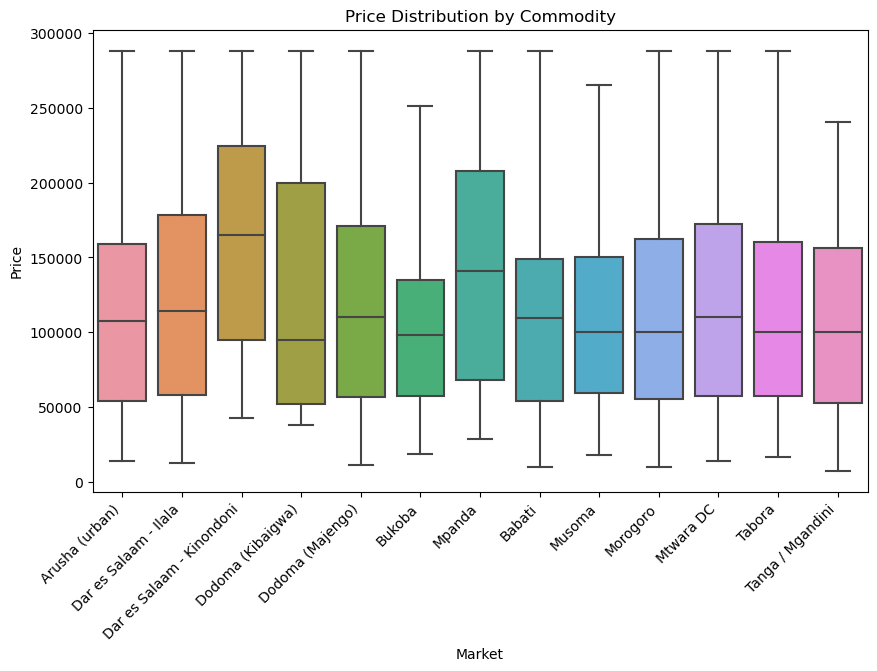

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="market", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Market")
plt.ylabel("Price")
plt.show()

In [67]:
def handle_outliers(data, column):
    Q3 = data[column].quantile(.75)
    Q1 = data[column].quantile(.25)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

In [68]:
maize_data = data[data['commodity'] == 'Maize']

In [69]:
lower, upper = handle_outliers(maize_data, 'price')

In [70]:
data.loc[((data['commodity'] == 'Maize') & (data['price'] < lower)), 'price'] = lower
data.loc[((data['commodity'] == 'Maize') & (data['price'] > upper)), 'price'] = upper

In [71]:
beans_data = data[data['commodity'] == 'Beans']

In [72]:
lower, upper = handle_outliers(beans_data, 'price')

In [73]:
data.loc[((data['commodity'] == 'Beans') & (data['price'] < lower)), 'price'] = lower
data.loc[((data['commodity'] == 'Beans') & (data['price'] > upper)), 'price'] = upper

In [74]:
rice_data = data[data['commodity'] == 'Rice']

In [75]:
lower, upper = handle_outliers(rice_data, 'price')

In [76]:
data.loc[((data['commodity'] == 'Rice') & (data['price'] < lower)), 'price'] = lower
data.loc[((data['commodity'] == 'Rice') & (data['price'] > upper)), 'price'] = upper

In [77]:
bukoba_data = data[data['market'] == 'Bukoba']

In [78]:
lower, upper = handle_outliers(bukoba_data, 'price')

In [79]:
data.loc[((data['market'] == 'Bukoba') & (data['price'] < lower)), 'price'] = lower
data.loc[((data['market'] == 'Bukoba') & (data['price'] > upper)), 'price'] = upper

In [60]:
data.to_csv('clean_food_data.csv', index=False)